# MACHINE LEARNING INTERN @ TECH-A-INTERN

### AUTHOR : PARVEJ ALAM M. ANSARI

## Level_2_Task_1: Image Captioning

### The dataset is available at Kaggle :
### https://www.kaggle.com/datasets/shamsaddin97/image-captioning-dataset-random-images

# Image Caption Generator with CNN & LSTM

You saw an image and your brain can easily tell what the image is about, but can a computer tell what the image is representing? Computer vision researchers worked on this a lot and they considered it impossible until now! With the advancement in Deep learning techniques, availability of huge datasets and computer power, we can build models that can generate captions for an image.

This is what we are going to implement in this Python based project where we will use deep learning techniques of Convolutional Neural Networks and a type of Recurrent Neural Network (LSTM) together.

## What is Image Caption Generator?

Image caption generator is a task that involves computer vision and natural language processing concepts to recognize the context of an image and describe them in a natural language like English.

### Image Caption Generator using CNN and LSTM.

The objective of our project is to learn the concepts of a CNN and LSTM model and build a working model of Image caption generator by implementing CNN with LSTM.

In this Task, we will be implementing the caption generator using **CNN (Convolutional Neural Networks)** and LSTM **(Long short term memory)**. The image features will be extracted from Xception which is a CNN model trained on the imagenet dataset and then we feed the features into the LSTM model which will be responsible for generating the image captions.

## 1. Import required libraries

In [1]:
import os   # handling the files
import pickle # storing numpy features
import numpy as np
from tqdm.notebook import tqdm # how much data is process till now

from tensorflow.keras.applications.vgg16 import VGG16 , preprocess_input # extract features from image data.
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input , Dense , LSTM , Embedding , Dropout , add

**os** - used to handle files using system commands.

**pickle** - used to store numpy features extracted

**numpy** - used to perform a wide variety of mathematical operations on arrays

**tqdm** - progress bar decorator for iterators. Includes a default range iterator printing to stderr.

**VGG16, preprocess_input** - imported modules for feature extraction from the image data

**load_img, img_to_array** - used for loading the image and converting the image to a numpy array

**Tokenizer** - used for loading the text as convert them into a token

**pad_sequences** - used for equal distribution of words in sentences filling the remaining spaces with zeros

**plot_model** - used to visualize the architecture of the model through different images

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ansariparvejalam","key":"4411d7bbf0efdc17430d1c0f7a5d8726"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d shamsaddin97/image-captioning-dataset-random-images -p /content

 82% 25.0M/30.4M [00:00<00:00, 74.1MB/s]
100% 30.4M/30.4M [00:00<00:00, 84.3MB/s]


In [5]:
!unzip /content/image-captioning-dataset-random-images -d /content

Archive:  /content/image-captioning-dataset-random-images.zip
  inflating: /content/images/0.jpg   
  inflating: /content/images/1002.jpg  
  inflating: /content/images/1005.jpg  
  inflating: /content/images/1008.jpg  
  inflating: /content/images/1011.jpg  
  inflating: /content/images/1014.jpg  
  inflating: /content/images/1017.jpg  
  inflating: /content/images/102.jpg  
  inflating: /content/images/1020.jpg  
  inflating: /content/images/1023.jpg  
  inflating: /content/images/1026.jpg  
  inflating: /content/images/1029.jpg  
  inflating: /content/images/1032.jpg  
  inflating: /content/images/1035.jpg  
  inflating: /content/images/1038.jpg  
  inflating: /content/images/1041.jpg  
  inflating: /content/images/1044.jpg  
  inflating: /content/images/1047.jpg  
  inflating: /content/images/105.jpg  
  inflating: /content/images/1050.jpg  
  inflating: /content/images/1053.jpg  
  inflating: /content/images/1056.jpg  
  inflating: /content/images/1059.jpg  
  inflating: /content/

## 2. Data Preparation

In [6]:
import os
import shutil
import glob

# Define paths
base_directory = '/content'

# List all files in the 'images' folder
images_folder = os.path.join(base_directory, 'images')
files_in_images = glob.glob(os.path.join(images_folder, '*'))

# Create separate folders for images and CSVs
new_images_folder = os.path.join(base_directory, 'new_images')
csv_folder = os.path.join(base_directory, 'csv')

# Create new directories
os.makedirs(new_images_folder, exist_ok=True)
os.makedirs(csv_folder, exist_ok=True)

# Move images to the new 'images' folder
for file_path in files_in_images:
    # Check if it's a CSV or an image file
    if file_path.lower().endswith('.csv'):
        shutil.move(file_path, csv_folder)
    else:
        shutil.move(file_path, new_images_folder)

# 3. Extract Image Features using Pre-Trained VGG-16 CNN Model

We have to load and restructure the model

VGG-16 is a convolutional neural network that is 16 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database [1]. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.

In [7]:
# Load vgg16 Model
model = VGG16()
# restructure model
model = Model(inputs = model.inputs , outputs = model.layers[-2].output)
# Summerize
print(model.summary())

553467096/553467096 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

+ Fully connected layer of the VGG16 model is not needed, just the previous layers to extract feature results.

+ By preference you may include more layers, but for quicker results avoid adding the unnecessary layers.

# 4. Extract the image features


Now we extract the image features and load the data for preprocess

In [8]:
# extract features from image
features = {}
directory = os.path.join(base_directory, 'new_images')

for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = preprocess_input(image)
    # extract features
    feature = model.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features[image_id] = feature

  0%|          | 0/2046 [00:00<?, ?it/s]

+ Dictionary 'features' is created and will be loaded with the extracted features of image data

+ load_img(img_path, target_size=(224, 224)) - custom dimension to resize the image when loaded to the array

+ image.reshape((1, image.shape[0], image.shape[1], image.shape[2])) - reshaping the image data to preprocess in a RGB type image.

+ model.predict(image, verbose=0) - extraction of features from the image

+ img_name.split('.')[0] - split of the image name from the extension to load only the image name.


In [9]:
# store features in pickle
pickle.dump(features, open(os.path.join(base_directory, 'features.pkl'), 'wb'))

Extracted features are not stored in the disk, so re-extraction of features can extend running time

Dumps and store your dictionary in a pickle for reloading it to save time.

In [10]:
# load features from pickle
with open(os.path.join(base_directory, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

Load all your stored feature data to your project for quicker runtime

# 5. Load the Captions Data

Let us store the captions data from the csv file.

In [11]:
import csv
import os

base_directory = '/content'

# Read the CSV file
csv_file_path = os.path.join(base_directory, 'csv', 'image_captions.csv')

# Create mapping of image name to captions
mapping = {}

with open(csv_file_path, newline='') as csvfile:
    csv_reader = csv.DictReader(csvfile)
    for row in csv_reader:
        image_name = row['img_name']
        image_caption = row['img_caption']

        # Remove extension from image name if needed
        image_id = os.path.splitext(image_name)[0]

        # Create list if needed
        if image_id not in mapping:
            mapping[image_id] = []

        # Store the caption
        mapping[image_id].append(image_caption)

In [12]:
len(mapping)

2046

+ Dictionary 'mapping' is created with key as image_id and values as the corresponding caption text

+ Same image may have multiple captions, **if image_id not in mapping: mapping[image_id] = []** creates a list for appending captions to the corresponding image

# 6. Preprocess Text Data

In [13]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # convert to lowercase
            caption = caption.lower()
            # delete digits, special chars, etc.,
            caption = caption.replace('[^A-Za-z]', '')
            # delete additional spaces
            caption = caption.replace('\s+', ' ')
            # add start and end tags to the caption
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption

+ Defined to clean and convert the text for quicker process and better results

### Let us visualize the text **before** and **after** cleaning

In [14]:
# Before preprocess of text
mapping['0']

['Appetizer, Close-up, Snack, Food, Maasdam, Cheese']

In [15]:
# Preprocess the text
clean(mapping)

In [16]:
# After preprocess of text
mapping['0']

['startseq appetizer, close-up, snack, food, maasdam, cheese endseq']

#### Next we will store the preprocessed captions into a list

In [17]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [18]:
# No. of unique captions stored
len(all_captions)

2046

In [19]:
# Checking first 10 captions.
all_captions[:10]

['startseq appetizer, close-up, snack, food, maasdam, cheese endseq',
 'startseq grape, fruit, boiled, bun, food, cheese, tea ... endseq',
 'startseq male, teenager, black color, ethnic, child, adult, african ... endseq',
 'startseq drink, breakfast, food, juice, objects/equipment, fruit, freshness, morning, ... endseq',
 'startseq onion, picnic, meat, lunch, kebab, pork, preparation, refreshment, ... endseq',
 'startseq bird, snowy owl, carnivore, animal, animals and pets, ... endseq',
 'startseq toddler, outdoors, portrait, male, 18-24 months, color image, ... endseq',
 'startseq portrait, male beauty, men, male, bossy, ordering, white ... endseq',
 'startseq cathedral, europe, church, orthodox, jason day actor, ... endseq',
 'startseq wine, liquid, alcohol, drink, isolated on white, close-up, ... endseq']

# 7. Processing of Text Data
Now we start processing the text data

In [20]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [21]:
# Number of unique words
vocab_size

2829

In [22]:
# Get maximum length of the caption available, used for reference for the padding sequence.
max_length = max(len(caption.split()) for caption in all_captions)
max_length

11

# 8. Train Test Split

In [23]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

**Now we will define a batch and include the padding sequence**

In [24]:
# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq],num_classes=vocab_size)[0]
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

Padding sequence normalizes the size of all captions to the max size filling them with zeros for better results.

# 9. Model Creation (LSTM)

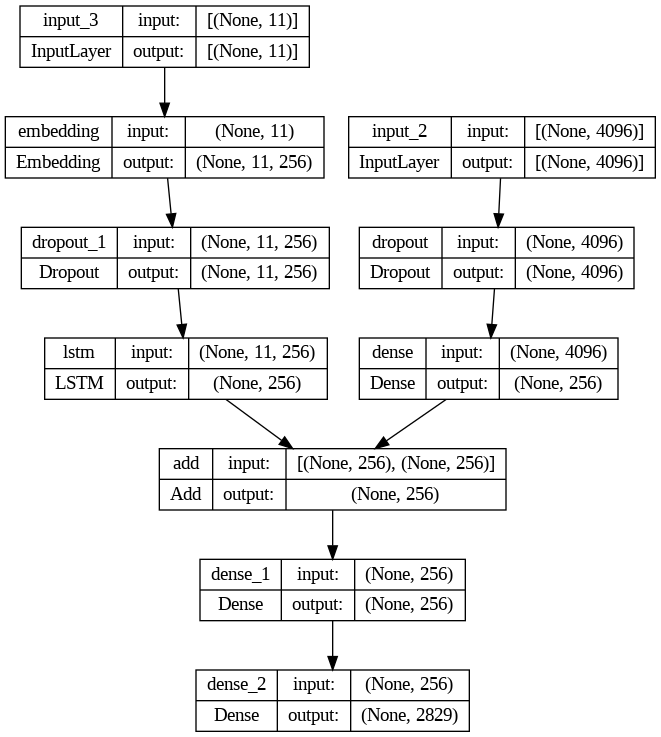

In [25]:
# Encoder model
# Image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# Sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# Decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Plot the model
plot_model(model, show_shapes=True)

+ **shape=(4096,)** - output length of the features from the VGG model

+ **Dense** - single dimension linear layer array

+ **Dropout()** - used to add regularization to the data, avoiding over fitting & dropping out a fraction of the data from the layers

+ **model.compile()** - compilation of the model

+ **loss=â€™sparse_categorical_crossentropyâ€™** - loss function for category outputs

+ **optimizer=â€™adamâ€™** - automatically adjust the learning rate for the model over the no. of epochs

+ Model plot shows the concatenation of the inputs and outputs into a single layer

+ Feature extraction of image was already done using VGG, no CNN model was needed in this step.

# 10. Train Model

In [26]:
# Train the model
epochs = 40
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

57/57 [==============================] - 3s 56ms/step - loss: 0.8686


+ **steps = len(train) // batch_size** - back propagation and fetch the next data

+ Loss decreases gradually over the iterations

+ Increase the no. of epochs for better results

+ Assign the no. of epochs and batch size accordingly for quicker results


### You can save the model in the base directory for reuse

In [27]:
# Save the model
model.save(base_directory+'/best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 11. Generate Captions for the Image

In [28]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

+ Convert the predicted index from the model into a word

In [29]:
# Generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
    return in_text

+ Captiongenerator appending all the words for an image

+ The caption starts with 'startseq' and the model continues to predict the caption until the 'endseq' appeared

# 12. Model Validation
Now we validate the data using BLEU Score

In [30]:
from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

for key in tqdm(test):
    # get actual caption
    captions = mapping[key]
    # predict the caption for image
    y_pred = predict_caption(model, features[key], tokenizer, max_length)
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/205 [00:00<?, ?it/s]

BLEU-1: 0.195465
BLEU-2: 0.009867


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


+ BLEU Score is used to evaluate the predicted text against a reference text, in a list of tokens.

+ The reference text contains all the words appended from the captions data (actual_captions)

+ A BLEU Score more than **0.4 is considered a good result**, for a better score increase the no. of epochs accordingly.

# 13. Visualize the Results

In [31]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    # load the image
    # image_name = "15.jpg"
    image_id = image_name.split('.')[0]
    img_path = os.path.join(base_directory, "new_images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

+ Image caption generator defined

+ First prints the actual captions of the image then prints a predicted caption of the image

---------------------Actual---------------------
startseq bird, snowy owl, carnivore, animal, animals and pets, ... endseq
--------------------Predicted--------------------
startseq bird snowy owl carnivore carnivore animals animals pets endseq


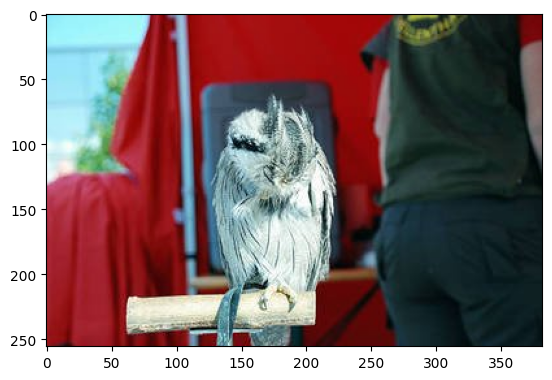

In [32]:
## Use Case: 01
generate_caption("15.jpg")

---------------------Actual---------------------
startseq breakfast, wheat, vegetable, cheese, bread, food and drink, ... endseq
--------------------Predicted--------------------
startseq breakfast wheat wheat bread bread bread food drink endseq


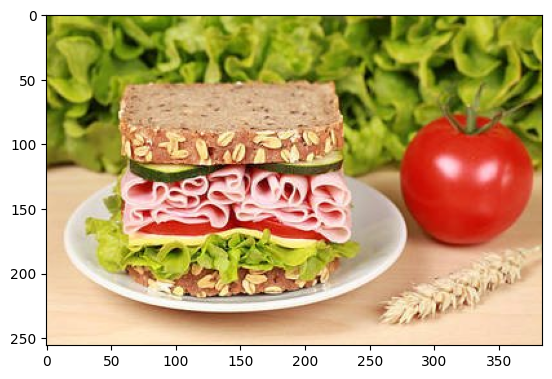

In [33]:
## Use Case: 02
generate_caption("30.jpg")

---------------------Actual---------------------
startseq chocolate, chocolate candy, pastry, butter, photography themes, market ... endseq
--------------------Predicted--------------------
startseq chocolate chocolate candy pastry butter photography themes market endseq


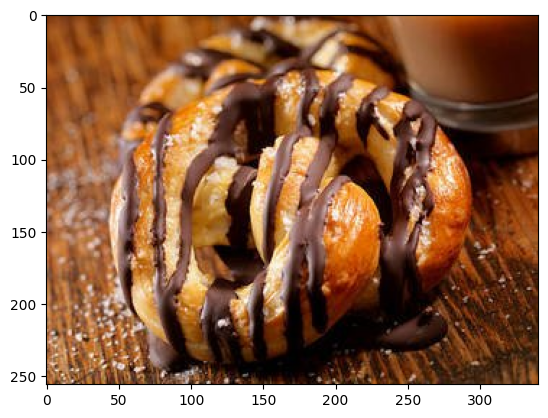

In [34]:
## Use Case: 03
generate_caption("45.jpg")

# Some Important Remarks

+ Training the model by increasing the no. of epochs can give better and more accurate results.

+ Processing large amount of data can take a lot of time and system resource.

+ The no. of layers of the model can be increased if you want to process large dataset.


<p style="background-color:#F1C40F;color:black;font-size:22px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #F1C40F;">Thank youðŸ˜„!!!!!!</p>